### Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Dataframe

In [4]:
df = pd.read_csv('wines_SPA.csv')

### Data Cleaning

In [6]:
df.sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1262,Hacienda Monasterio,Reserva,2013,4.3,431,Espana,Ribera del Duero,53.95,Ribera Del Duero Red,5.0,3.0
2184,Vina Pedrosa,Gran Reserva,2011,4.2,410,Espana,Ribera del Duero,51.35,Ribera Del Duero Red,5.0,3.0
2299,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00,Rioja Red,4.0,3.0
5595,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
4293,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,4.0,3.0


In [7]:
df['winery'].unique()

array(['Teso La Monja', 'Artadi', 'Vega Sicilia', 'Pago de Carraovejas',
       'Toro Albala', 'Bodegas El Nido', 'Valdespino',
       'Dominio de Pingus', 'Alvaro Palacios', 'Ordonez',
       'Bodegas Valduero', 'Vina Sastre', 'Sierra Cantabria',
       'Descendientes de J. Palacios', 'La Rioja Alta',
       'Marques de Murrieta', 'Vinedos de Paganos', 'Emilio Moro',
       'Quinta de la Quietud', 'Bodegas Mauro',
       'Bodega Contador (Benjamin Romeo)', 'Remirez de Ganuza',
       'Bodegas San Roman', 'Pago de Los Capellanes', 'Bodega Numanthia',
       'Alto Moncayo', 'Mas Doix', 'Finca Moncloa', 'Bodegas Roda',
       'Martinet', 'Recaredo', 'Clos Erasmus', 'Barbadillo',
       'Gonzalez-Byass', 'Bodegas Amaren', 'Alvear', 'Equipo Navazos',
       'Morca', 'Territorio Luthier', 'Rafael Palacios', 'Terra Remota',
       'Dehesa de Los Canonigos', 'Miguel Merino', 'Gutierrez de la Vega',
       'Alion', 'Aalto', 'Carmelo Rodero', 'Dominio del Bendito',
       "Mas d'en Gil", 'Casa 

In [8]:
df['type'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [10]:
df['country'].unique()

array(['Espana'], dtype=object)

In [11]:
# As there is only ! country, drop the column
df = df.drop(columns = ['country'])

In [12]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [13]:
# Convert Year to How old is the wine
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7210 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   float64
 7   type         6955 non-null   object 
 8   body         6331 non-null   float64
 9   acidity      6331 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 586.1+ KB


### Fill Na values of year, body and acidity

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [17]:
df['year'] = imputer.fit_transform(df[['year']])
df['body'] = imputer.fit_transform(df[['body']])
df['acidity'] = imputer.fit_transform(df[['acidity']])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   float64
 7   type         6955 non-null   object 
 8   body         7500 non-null   float64
 9   acidity      7500 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 586.1+ KB


In [19]:
# Find how old the wine is:
df['year'] = 2024 - df['year']

In [20]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,11.0,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,6.0,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,15.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,25.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,28.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [21]:
df = df.rename(columns = {'year':'years_old'})

In [22]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,11.0,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,6.0,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,15.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,25.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,28.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   years_old    7500 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   float64
 7   type         6955 non-null   object 
 8   body         7500 non-null   float64
 9   acidity      7500 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 586.1+ KB


In [24]:
df = df.sort_values(by = 'num_reviews', ascending = False)

In [25]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0
1823,Marques de Riscal,Rioja Reserva,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0
46,Vega Sicilia,Unico Reserva Especial Edicion,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0
1114,La Rioja Alta,Vina Ardanza Reserva,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0
1824,La Rioja Alta,Vina Ardanza Reserva,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0


In [26]:
average_rating_per_winery = df.groupby('winery')['rating'].mean().reset_index()
average_rating_per_winery.columns = ['winery', 'average_rating']

In [27]:
# Merge the average rating back to the original DataFrame
df = df.merge(average_rating_per_winery, on='winery', how='left')

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity,average_rating
0,Felix Solis,Mucho Mas Tinto,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0,4.200000
1,Marques de Riscal,Rioja Reserva,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0,4.323810
2,Vega Sicilia,Unico Reserva Especial Edicion,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0,4.671134
3,La Rioja Alta,Vina Ardanza Reserva,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0,4.221654
4,La Rioja Alta,Vina Ardanza Reserva,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0,4.221654


In [31]:
le.fit(df['wine'])
df['wine'] = le.transform(df['wine'])

In [32]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity,average_rating
0,Felix Solis,507,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0,4.200000
1,Marques de Riscal,669,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0,4.323810
2,Vega Sicilia,779,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0,4.671134
3,La Rioja Alta,815,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0,4.221654
4,La Rioja Alta,815,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0,4.221654


In [33]:
df.describe()

,wine,years_old,rating,num_reviews,price,body,acidity,average_rating
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,467.920267,10.446000,4.254933,451.109067,60.095822,4.133733,2.954933,4.254933
std,231.513538,6.811104,0.118029,723.001856,150.356676,0.539031,0.228858,0.098826
min,0.000000,3.000000,4.200000,25.000000,4.990000,2.000000,1.000000,4.200000
25%,260.000000,7.000000,4.200000,389.000000,18.900000,4.000000,3.000000,4.201345
50%,496.000000,9.000000,4.200000,404.000000,28.530000,4.000000,3.000000,4.203965
75%,666.000000,13.000000,4.200000,415.000000,51.350000,4.000000,3.000000,4.242912
max,846.000000,114.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000,4.700000


In [47]:
df.region.unique()

array(['Vino de Espana', 'Rioja', 'Ribera del Duero', 'Cataluna',
       'Sardon de Duero', 'Toro', 'Rias Baixas', 'Castilla y Leon',
       'Priorato', 'Jumilla', 'Penedes', 'Rioja Alta', 'Valdeorras',
       'Almansa', 'Campo de Borja', 'Jerez Oloroso', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Rueda', 'Jerez-Xeres-Sherry', 'Alicante',
       'Jerez Amontillado', 'Emporda', 'Jerez Pedro Ximenes (PX)',
       'Navarra', 'Costers del Segre', 'Utiel-Requena', 'Valencia',
       'Mallorca', 'Yecla', 'Bierzo', 'Somontano', 'Sierras de Malaga',
       'Jerez Cream', 'Conca de Barbera', 'Malaga', 'Pla de Bages',
       'Galicia', 'La Palma', 'Ribeiro', 'Montilla-Moriles', 'Aragon',
       'El Terrerazo', 'Castilla', 'Binissalem-Mallorca', 'Calatayud',
       'Madrid', 'Andalucia', 'Ribeira Sacra', 'Pla i Llevant',
       'Montsant', 'Dominio de Valdepusa', 'Rioja Alavesa', 'Arinzano',
       'Tarragona', 'Extremadura', 'Alella', 'Tierra del Vino de Zamora',
       'Murcia', 'Pago Calza

#### Text encoding Techniques

In [48]:
le.fit(df['region'])
df['Region'] = le.transform(df['region'])

In [49]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity,average_rating,Region
0,Felix Solis,507,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0,4.200000,74
1,Marques de Riscal,669,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0,4.323810,59
2,Vega Sicilia,779,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0,4.671134,57
3,La Rioja Alta,815,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0,4.221654,59
4,La Rioja Alta,815,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0,4.221654,59


In [51]:
df = df.drop(columns = ['region'])

In [53]:
df.head()

,winery,wine,years_old,rating,num_reviews,price,type,body,acidity,average_rating,Region
0,Felix Solis,507,9.0,4.2,32624,4.99,Red,4.0,3.0,4.200000,74
1,Marques de Riscal,669,8.0,4.2,16505,15.90,Rioja Red,4.0,3.0,4.323810,59
2,Vega Sicilia,779,9.0,4.7,12421,423.50,Ribera Del Duero Red,5.0,3.0,4.671134,57
3,La Rioja Alta,815,15.0,4.3,10273,24.38,Rioja Red,4.0,3.0,4.221654,59
4,La Rioja Alta,815,17.0,4.2,9098,23.70,Rioja Red,4.0,3.0,4.221654,59


In [54]:
le.fit(df['type'])
df['Type'] = le.transform(df['type'])

In [57]:
df = df.drop(columns = ['type'])

In [58]:
df.head()

,winery,wine,years_old,rating,num_reviews,price,body,acidity,average_rating,Region,Type
0,Felix Solis,507,9.0,4.2,32624,4.99,4.0,3.0,4.200000,74,10
1,Marques de Riscal,669,8.0,4.2,16505,15.90,4.0,3.0,4.323810,59,12
2,Vega Sicilia,779,9.0,4.7,12421,423.50,5.0,3.0,4.671134,57,11
3,La Rioja Alta,815,15.0,4.3,10273,24.38,4.0,3.0,4.221654,59,12
4,La Rioja Alta,815,17.0,4.2,9098,23.70,4.0,3.0,4.221654,59,12


In [59]:
df = df.drop(columns = ['winery', 'rating'])

In [60]:
df.head()

,wine,years_old,num_reviews,price,body,acidity,average_rating,Region,Type
0,507,9.0,32624,4.99,4.0,3.0,4.200000,74,10
1,669,8.0,16505,15.90,4.0,3.0,4.323810,59,12
2,779,9.0,12421,423.50,5.0,3.0,4.671134,57,11
3,815,15.0,10273,24.38,4.0,3.0,4.221654,59,12
4,815,17.0,9098,23.70,4.0,3.0,4.221654,59,12


In [74]:
df['num_reviews'].unique()

array([32624, 16505, 12421, 10273,  9098,  9092,  8318,  7825,  7529,
        7435,  7401,  7294,  7293,  7237,  6803,  6567,  6532,  6521,
        6395,  6345,  6256,  6163,  5938,  5863,  5802,  5732,  5614,
        5545,  5372,  5365,  5266,  5204,  5178,  5152,  5116,  5109,
        4994,  4979,  4935,  4851,  4767,  4747,  4685,  4625,  4610,
        4516,  4457,  4411,  4357,  4350,  4266,  4127,  4121,  4091,
        4023,  3997,  3929,  3829,  3825,  3788,  3725,  3660,  3648,
        3620,  3608,  3589,  3587,  3545,  3524,  3521,  3456,  3453,
        3443,  3437,  3406,  3383,  3354,  3327,  3239,  3225,  3224,
        3197,  3164,  3148,  3127,  3118,  3101,  3095,  3093,  3089,
        2990,  2936,  2935,  2923,  2911,  2901,  2887,  2858,  2844,
        2826,  2820,  2788,  2783,  2765,  2712,  2710,  2705,  2685,
        2676,  2575,  2551,  2546,  2530,  2480,  2478,  2453,  2423,
        2419,  2418,  2416,  2375,  2370,  2364,  2341,  2295,  2271,
        2241,  2234,

In [78]:
# Remove tuples with reviews less than 200
df_filtered = df[~(df['num_reviews'] < 200)]

In [80]:
df_filtered.head()

,wine,years_old,num_reviews,price,body,acidity,average_rating,Region,Type
0,507,9.0,32624,4.99,4.0,3.0,4.200000,74,10
1,669,8.0,16505,15.90,4.0,3.0,4.323810,59,12
2,779,9.0,12421,423.50,5.0,3.0,4.671134,57,11
3,815,15.0,10273,24.38,4.0,3.0,4.221654,59,12
4,815,17.0,9098,23.70,4.0,3.0,4.221654,59,12


### Data Visualisaation

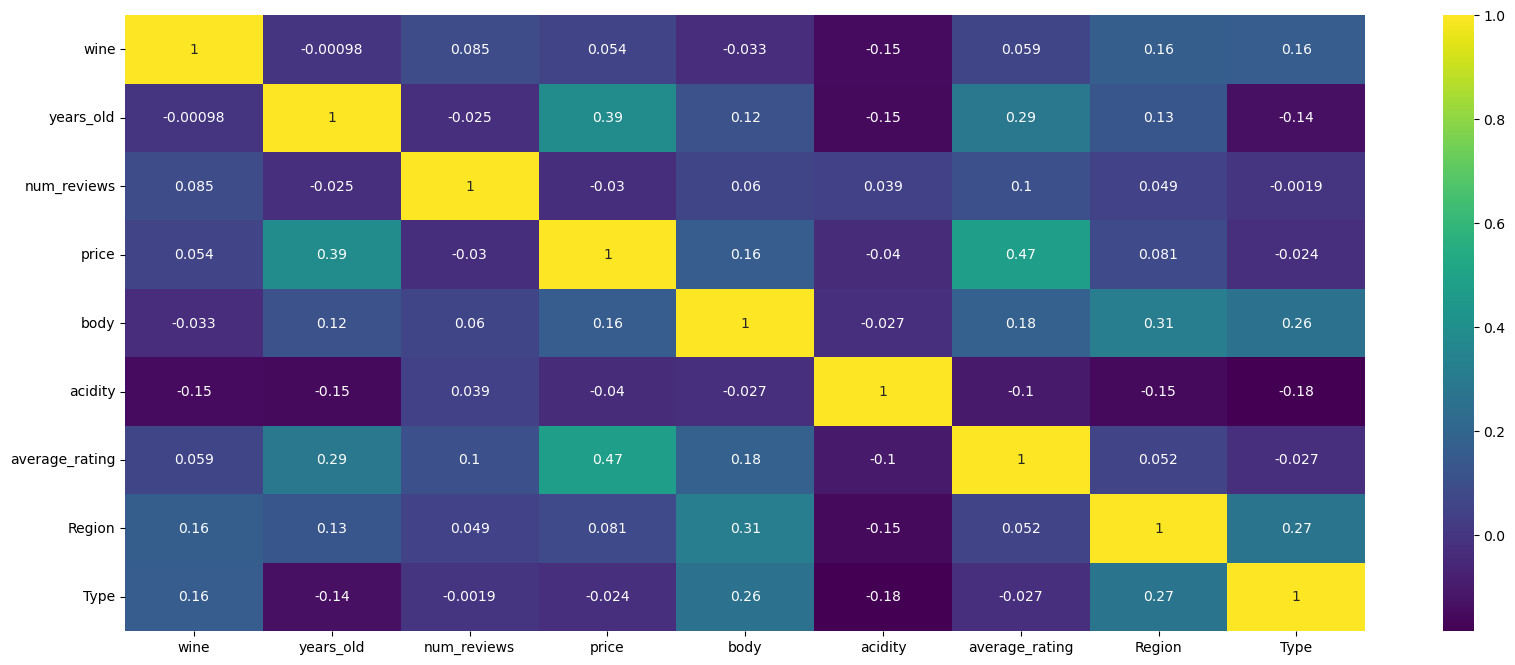

In [84]:
corr_matrix = df.corr()
plt.figure(figsize = (20,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [86]:
df = df.drop(columns = ['num_reviews', 'average_rating', 'price'])

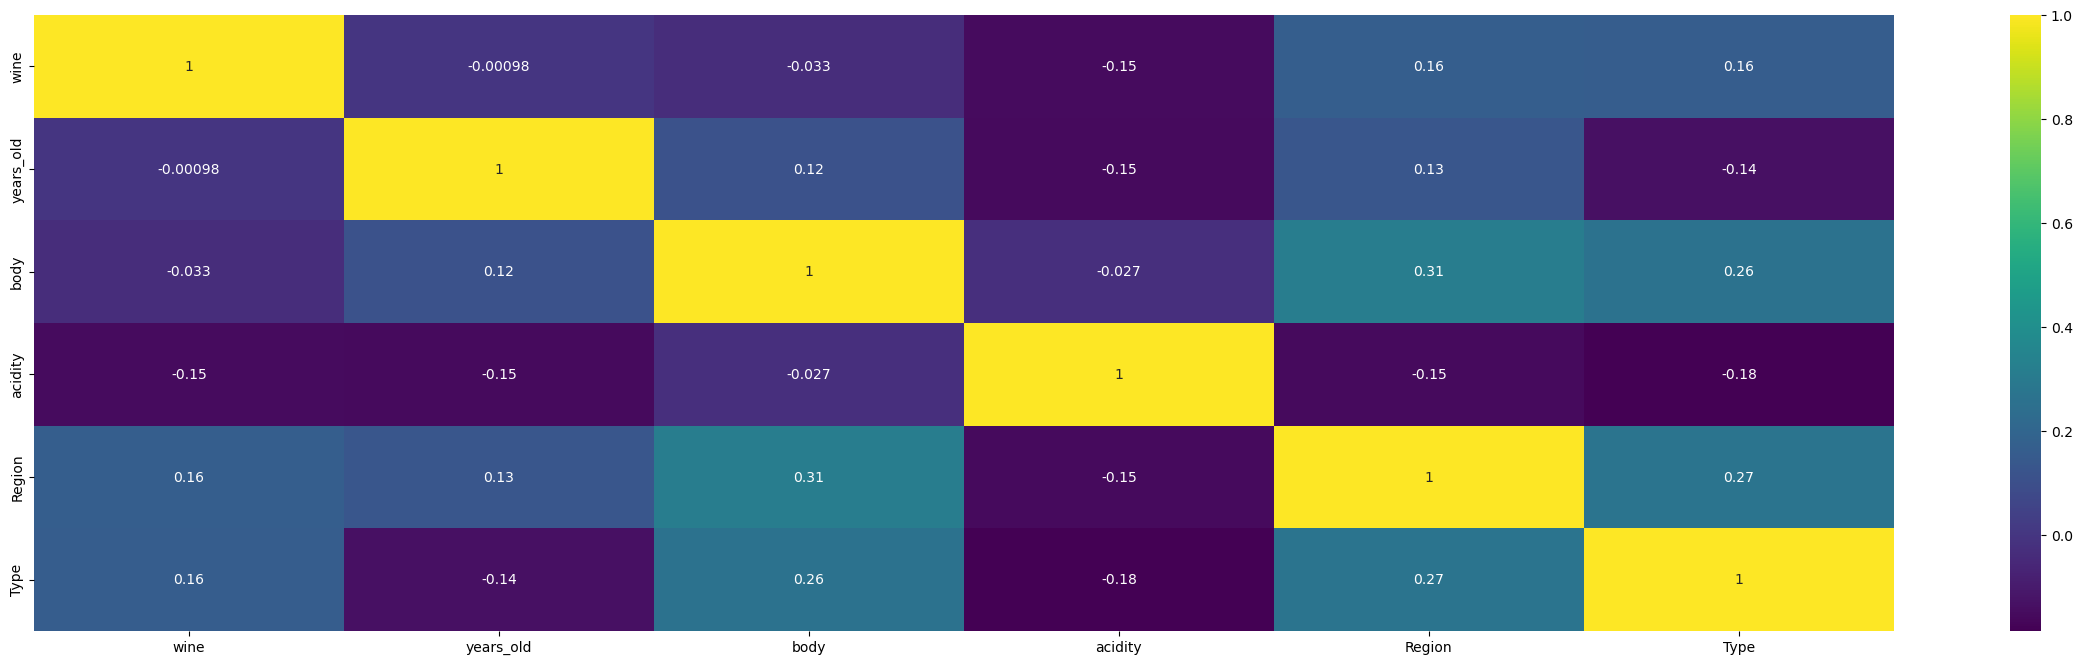

In [92]:
corr_matrix = df.corr()
plt.figure(figsize = (30,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [94]:
features = [col for col in df.columns if col not in ['Type']]

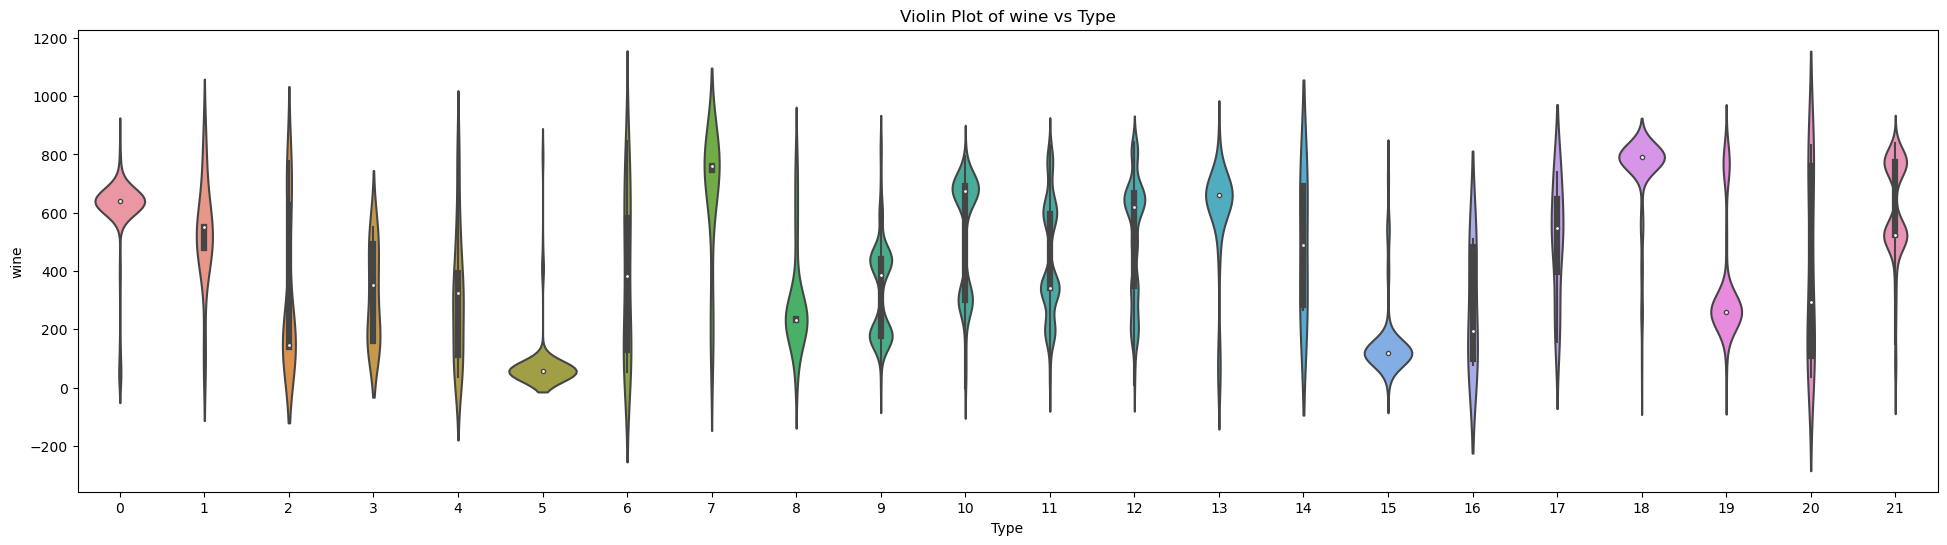

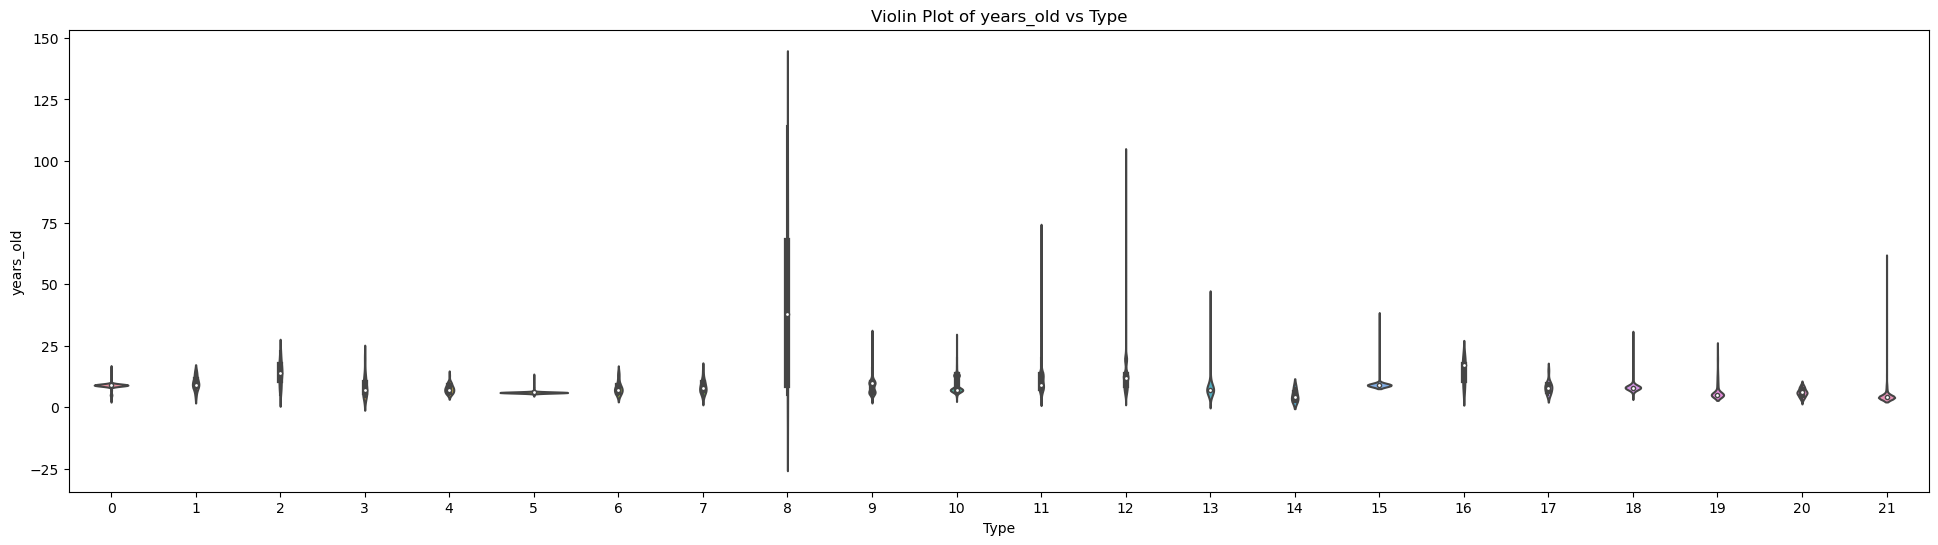

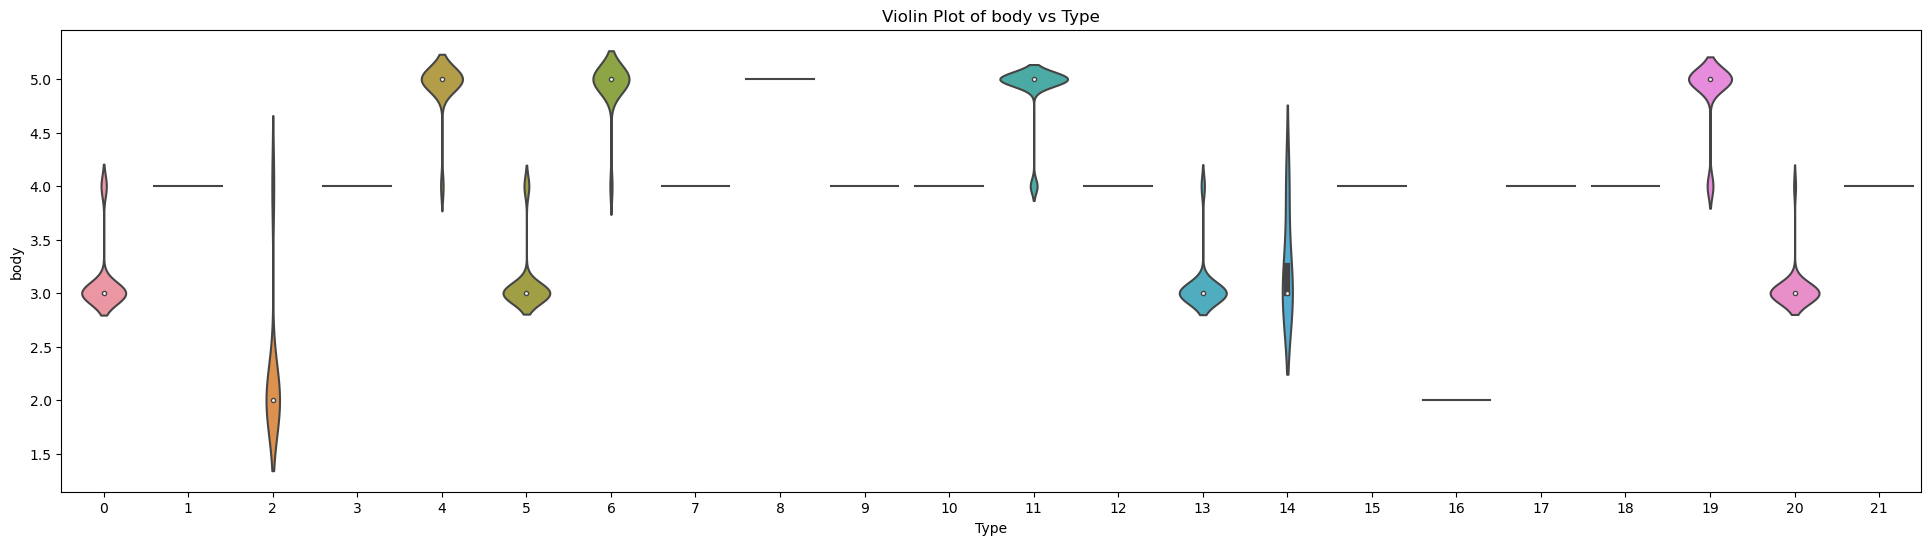

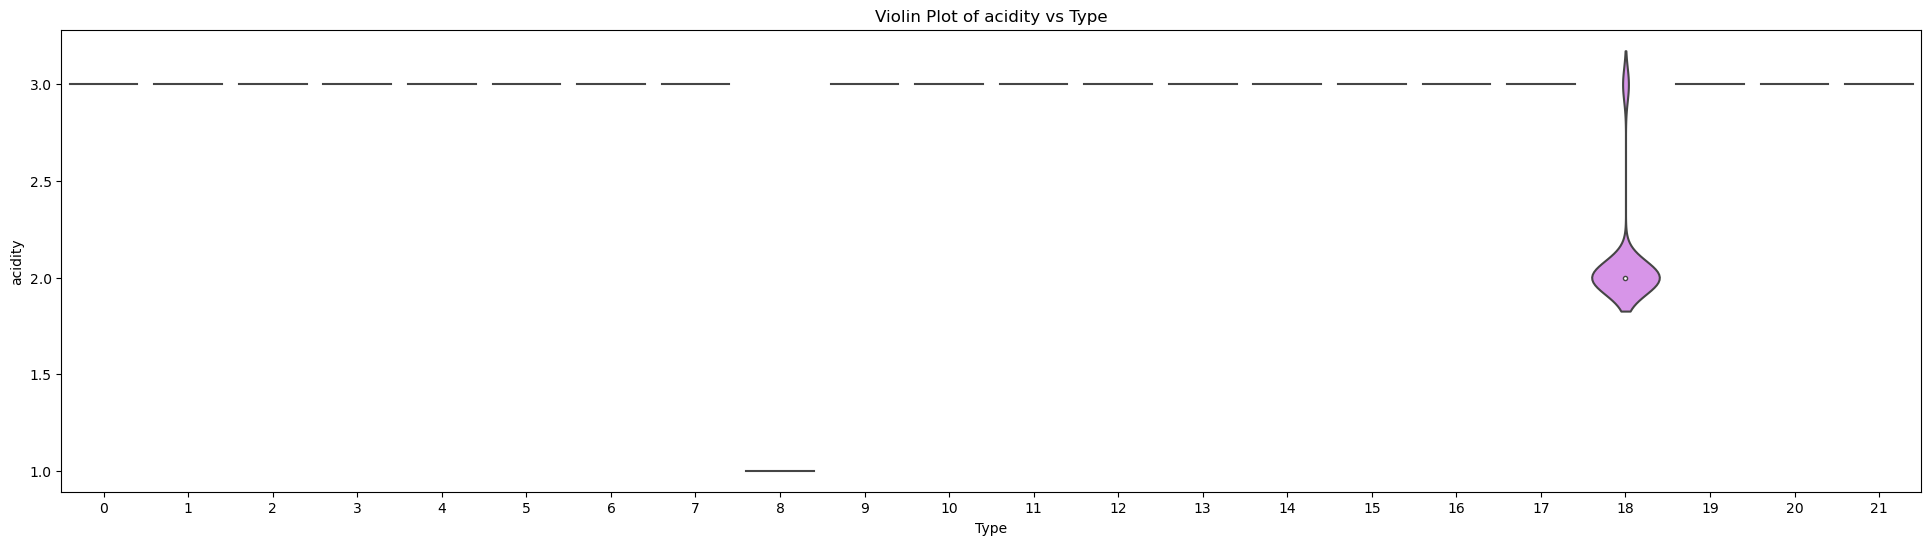

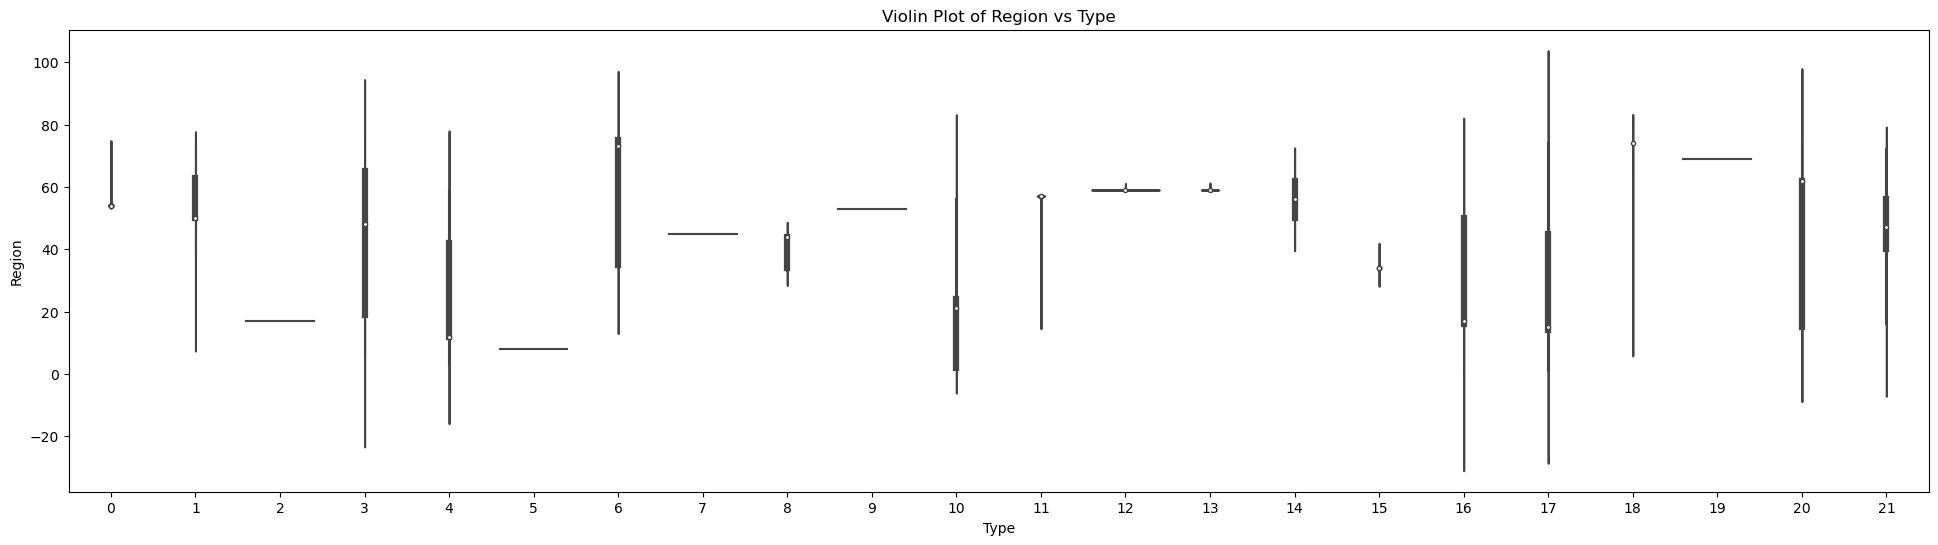

In [100]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.violinplot(x='Type', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} vs Type')
    plt.show()

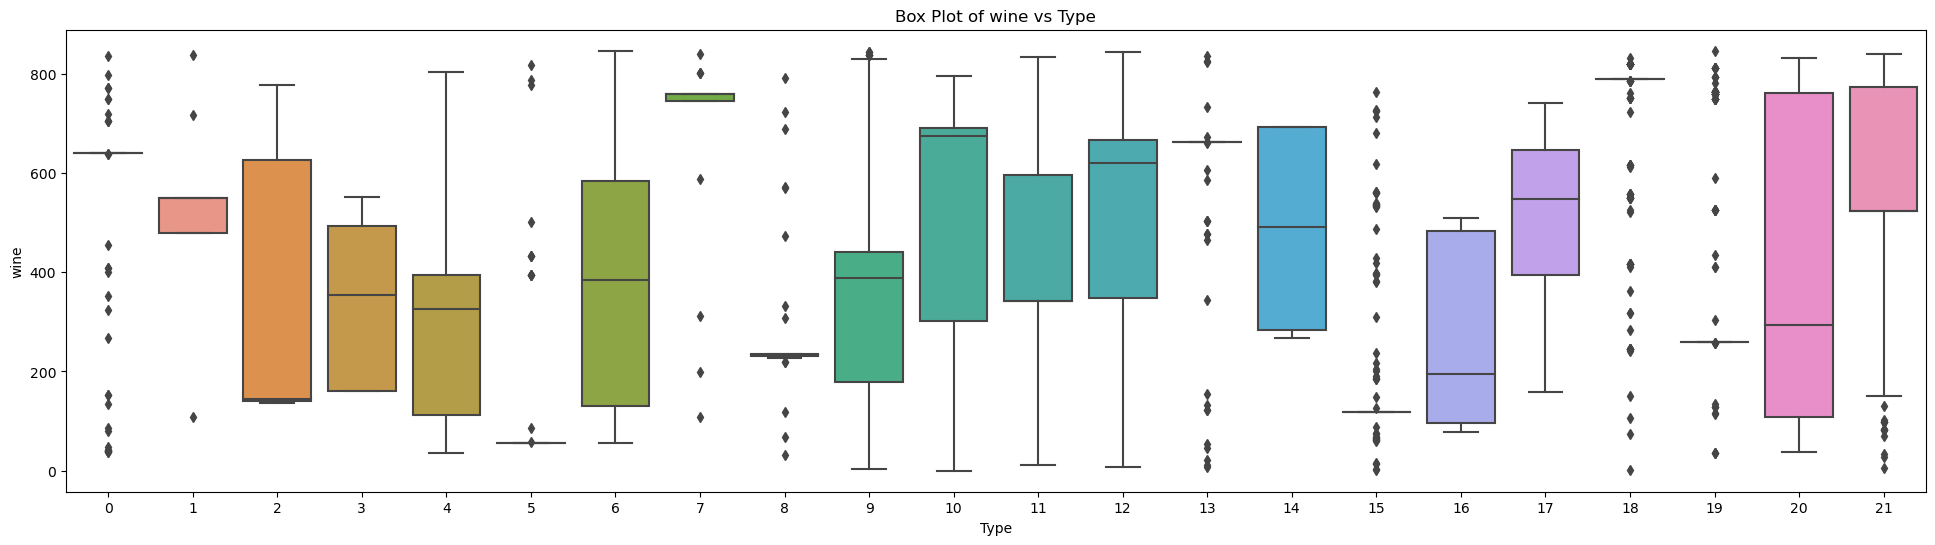

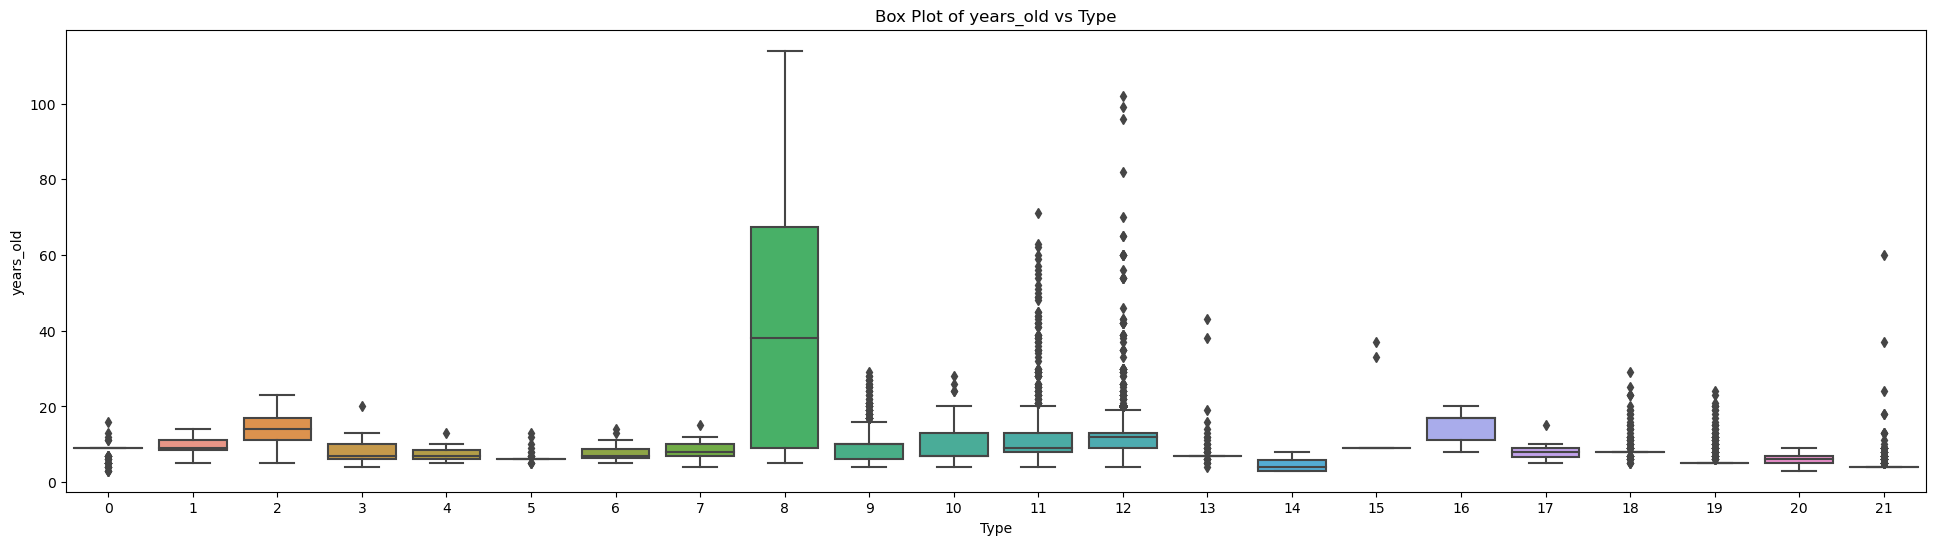

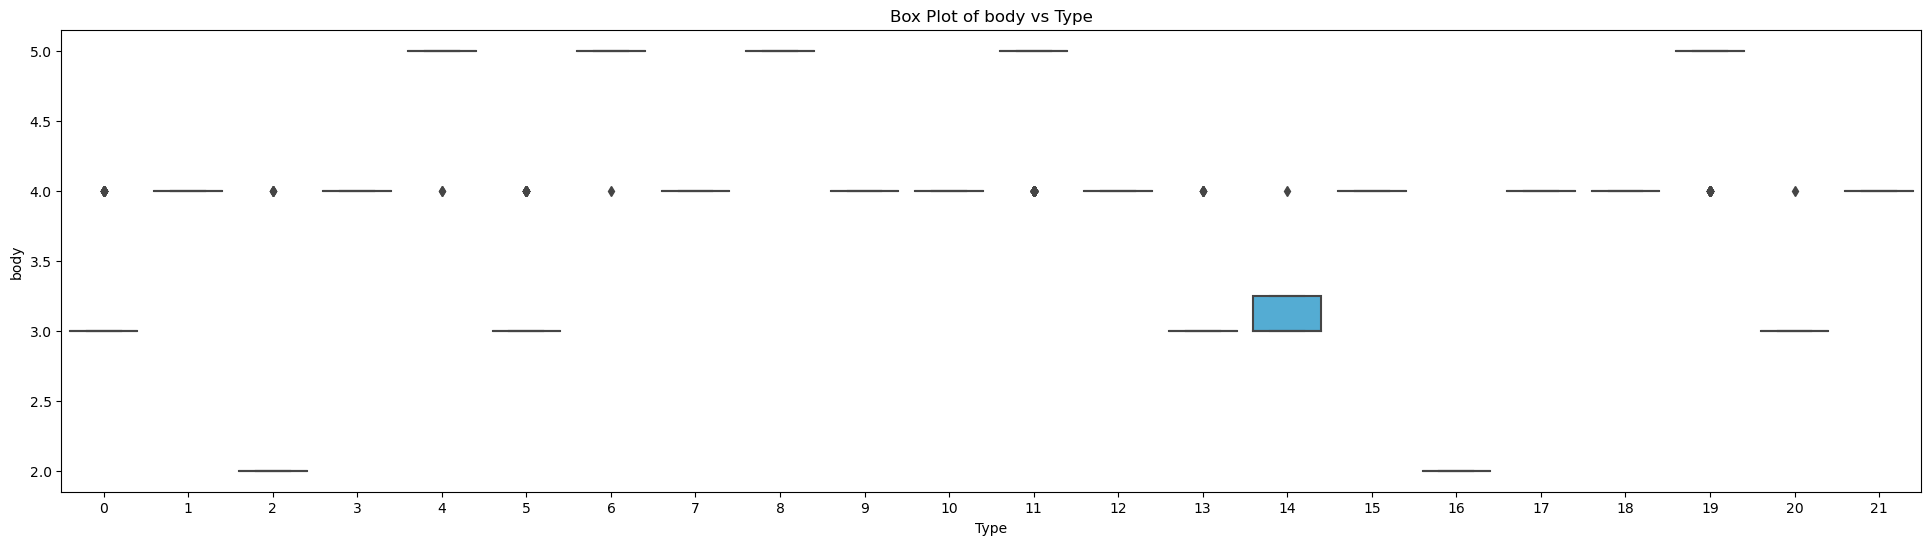

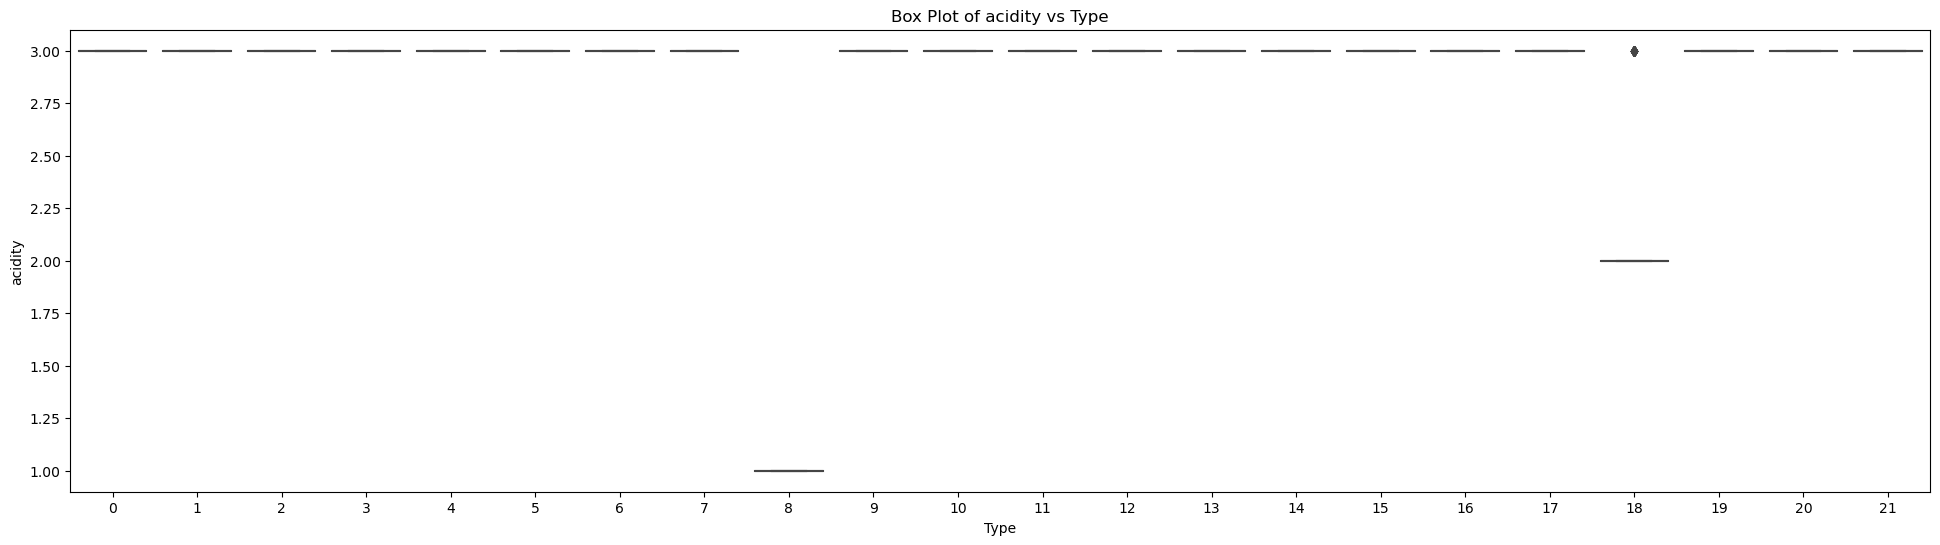

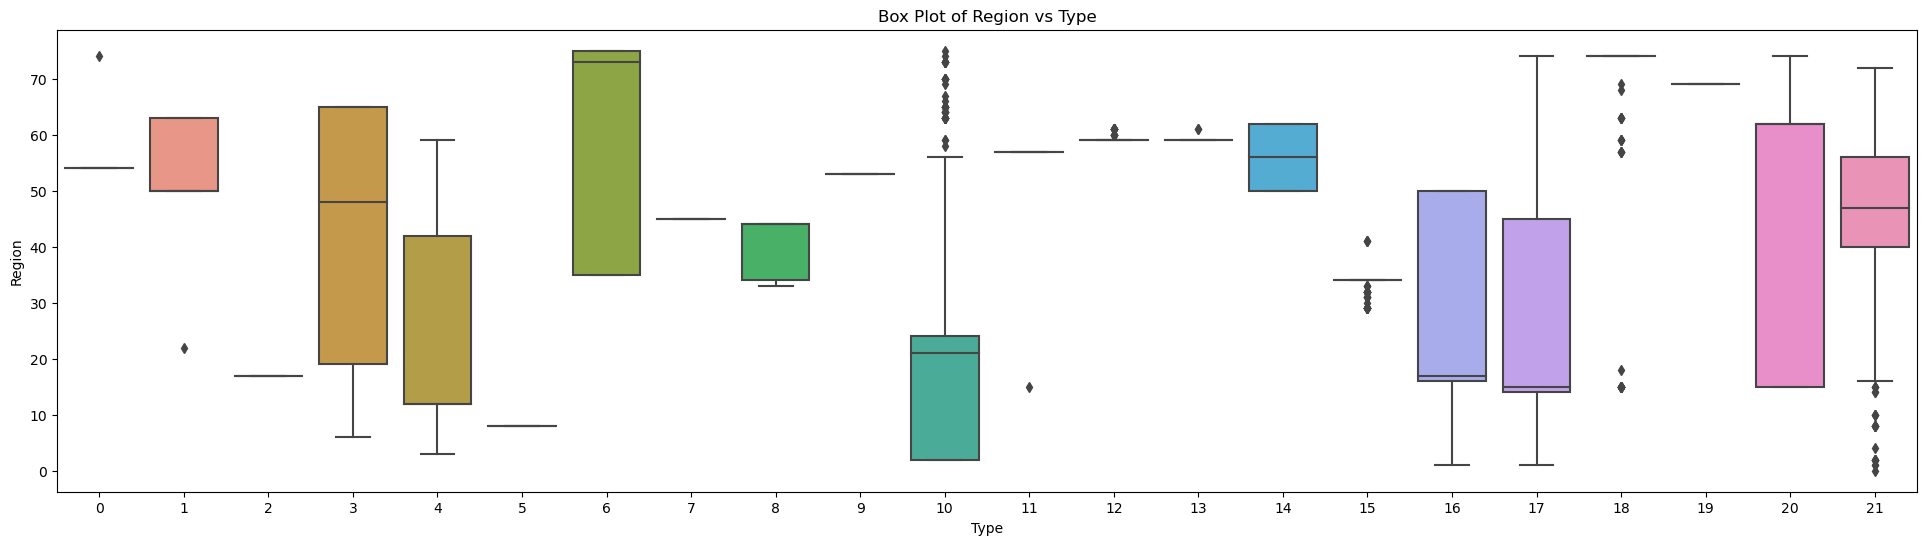

In [102]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.boxplot(x='Type', y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs Type')
    plt.show()

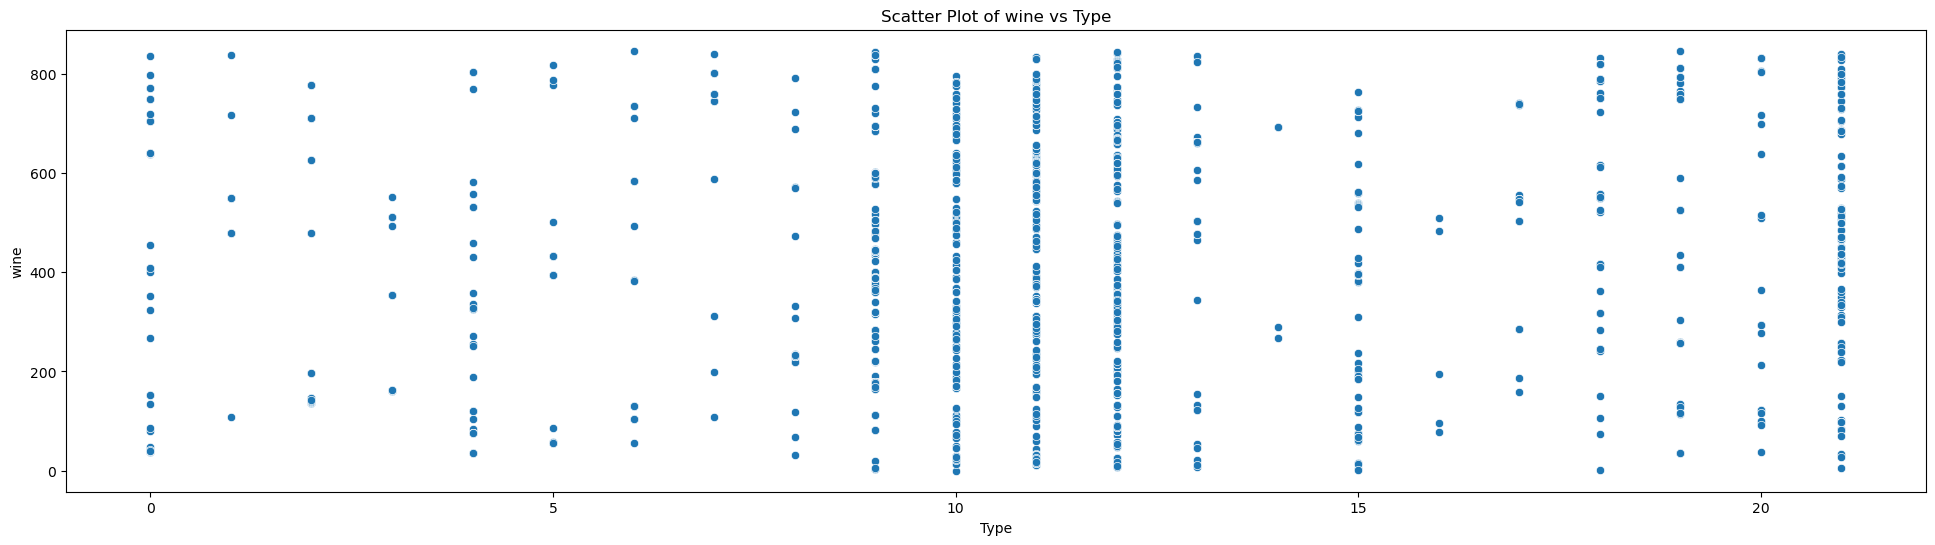

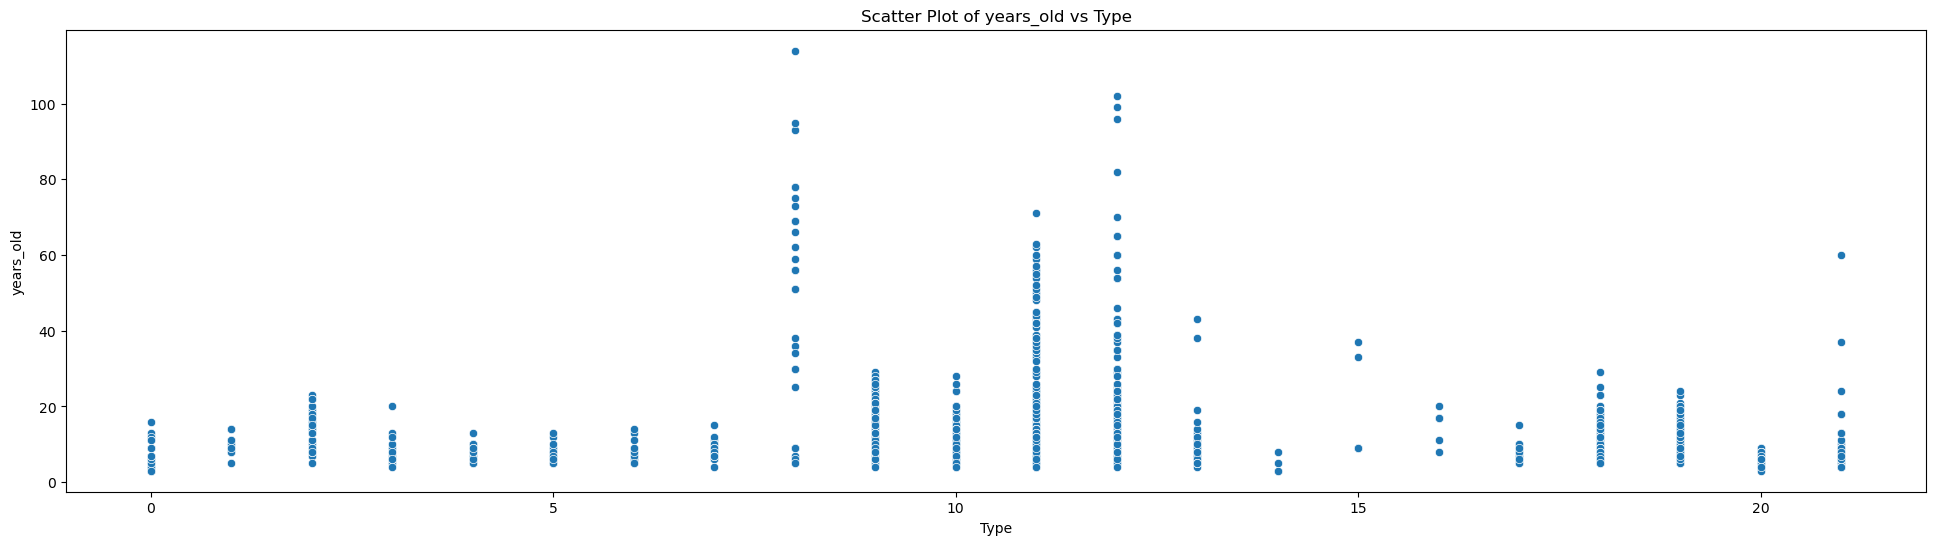

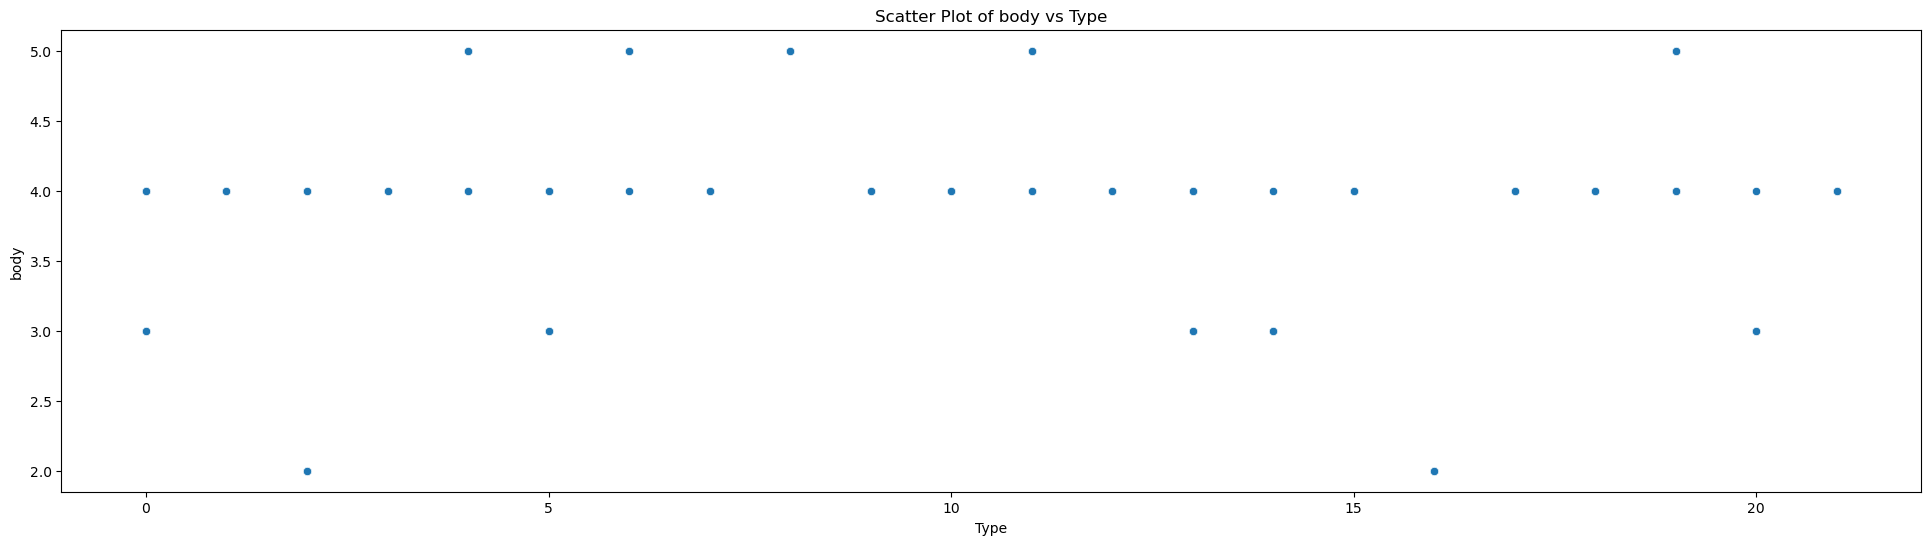

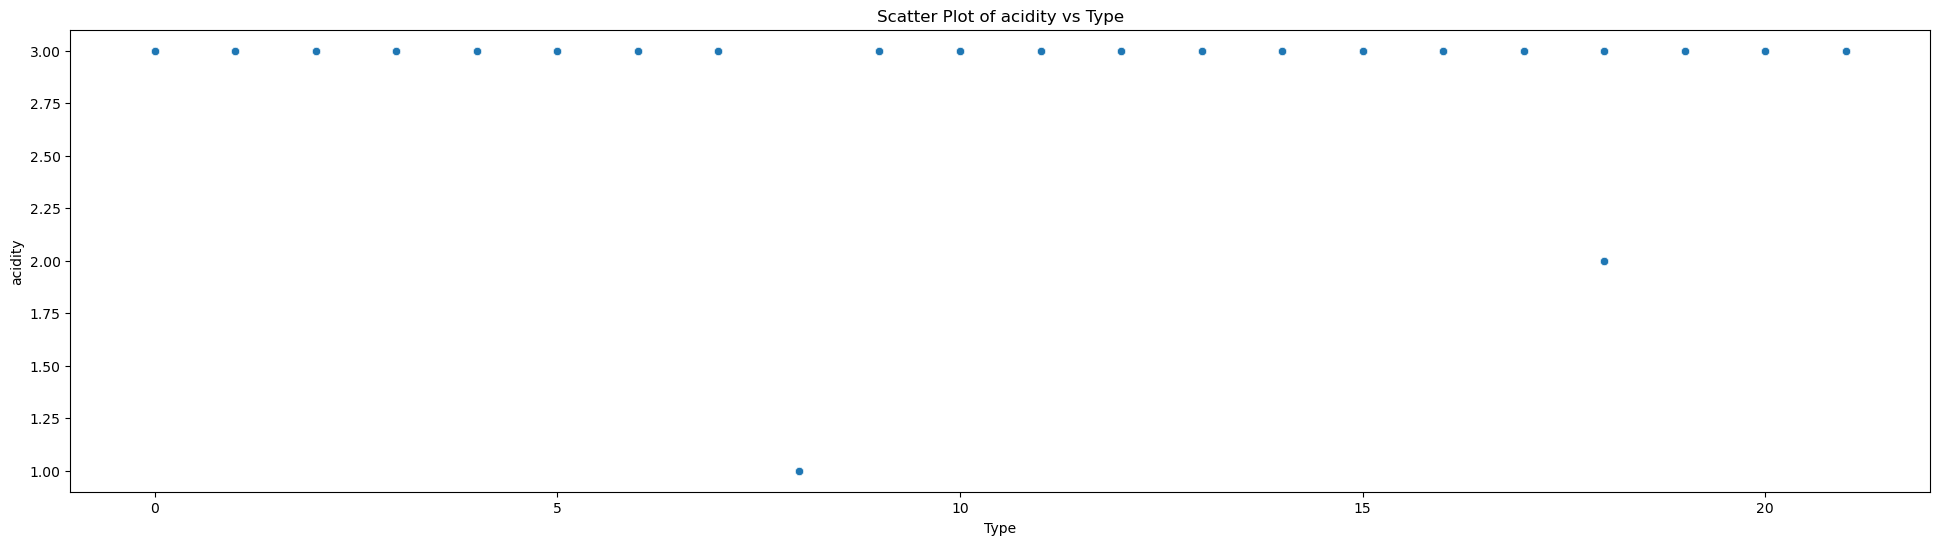

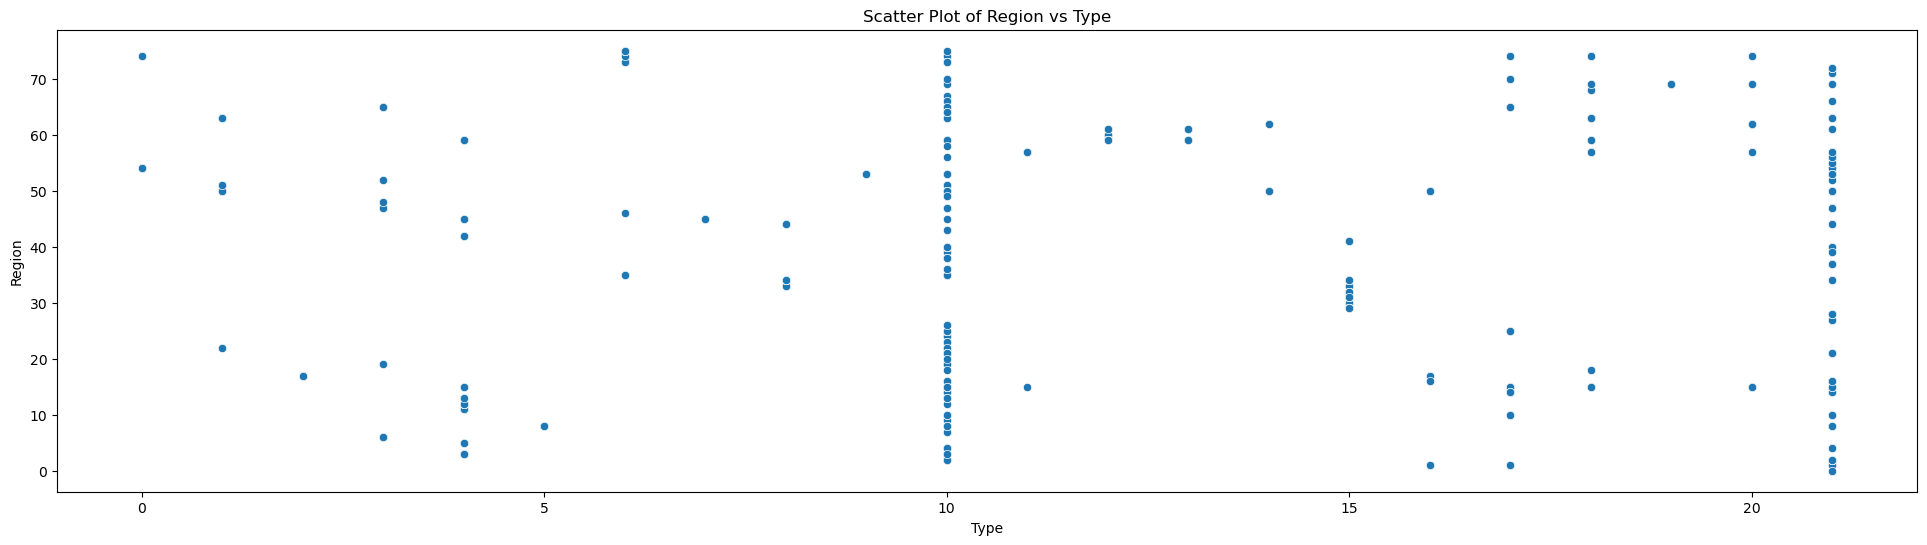

In [106]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.scatterplot(x='Type', y=feature, data=df)
    plt.title(f'Scatter Plot of {feature} vs Type')
    plt.show()

### Handle Outliers

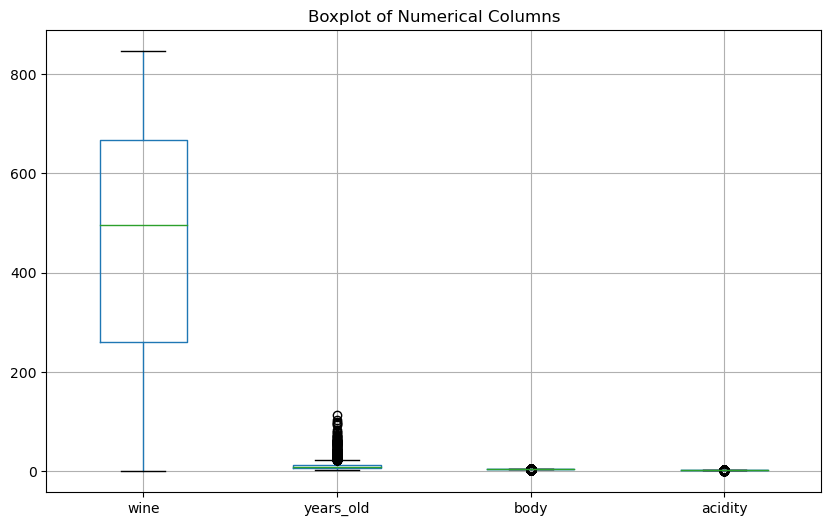

In [110]:
numerical_columns = ['wine', 'years_old', 'body', 'acidity']

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.show()

In [112]:
# Handling outliers using IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [114]:
# Filtering out outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)
df_no_outliers = df[~outliers.any(axis=1)]

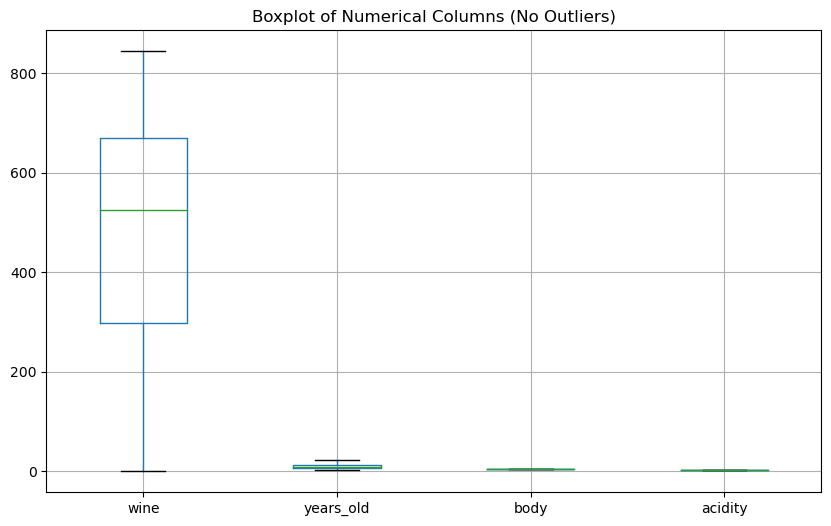

In [116]:
# Box plot of the filtered DataFrame
plt.figure(figsize=(10, 6))
df_no_outliers[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns (No Outliers)')
plt.show()

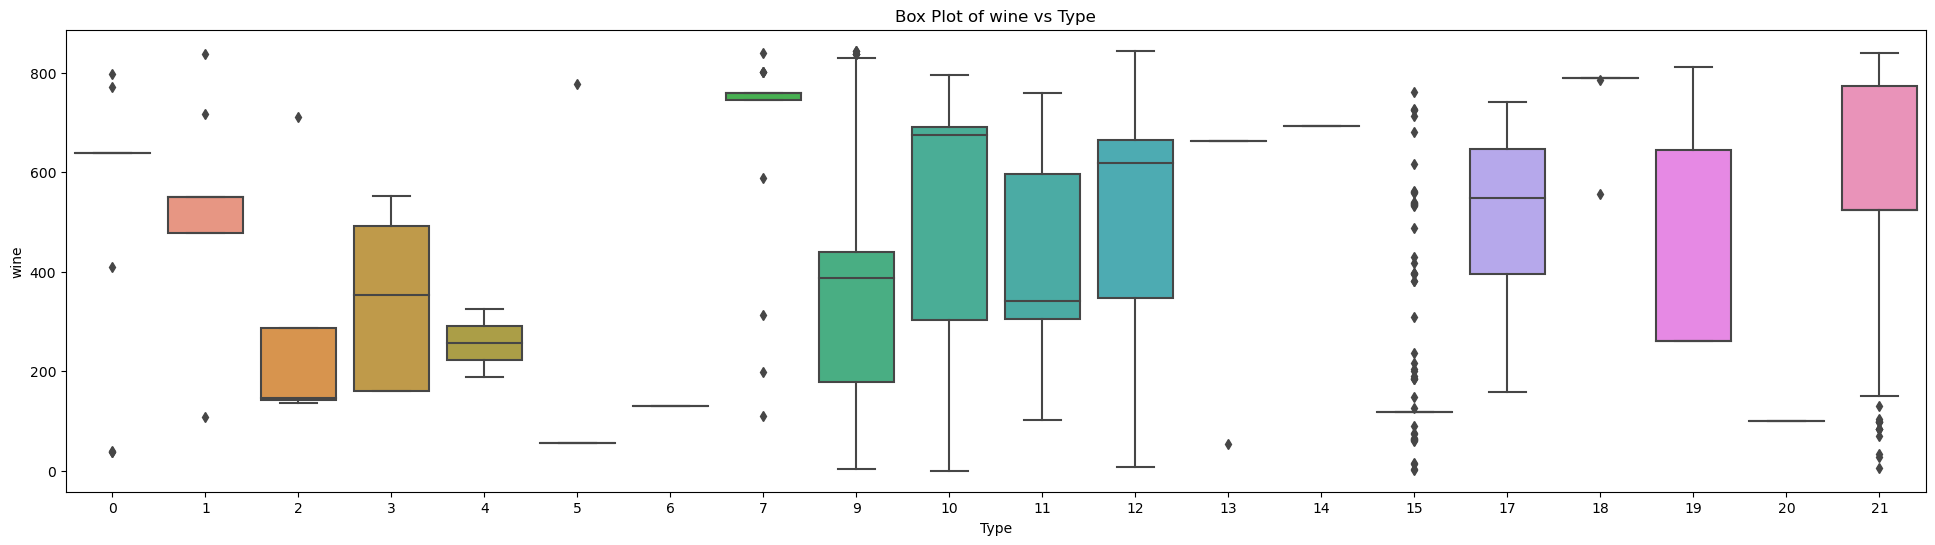

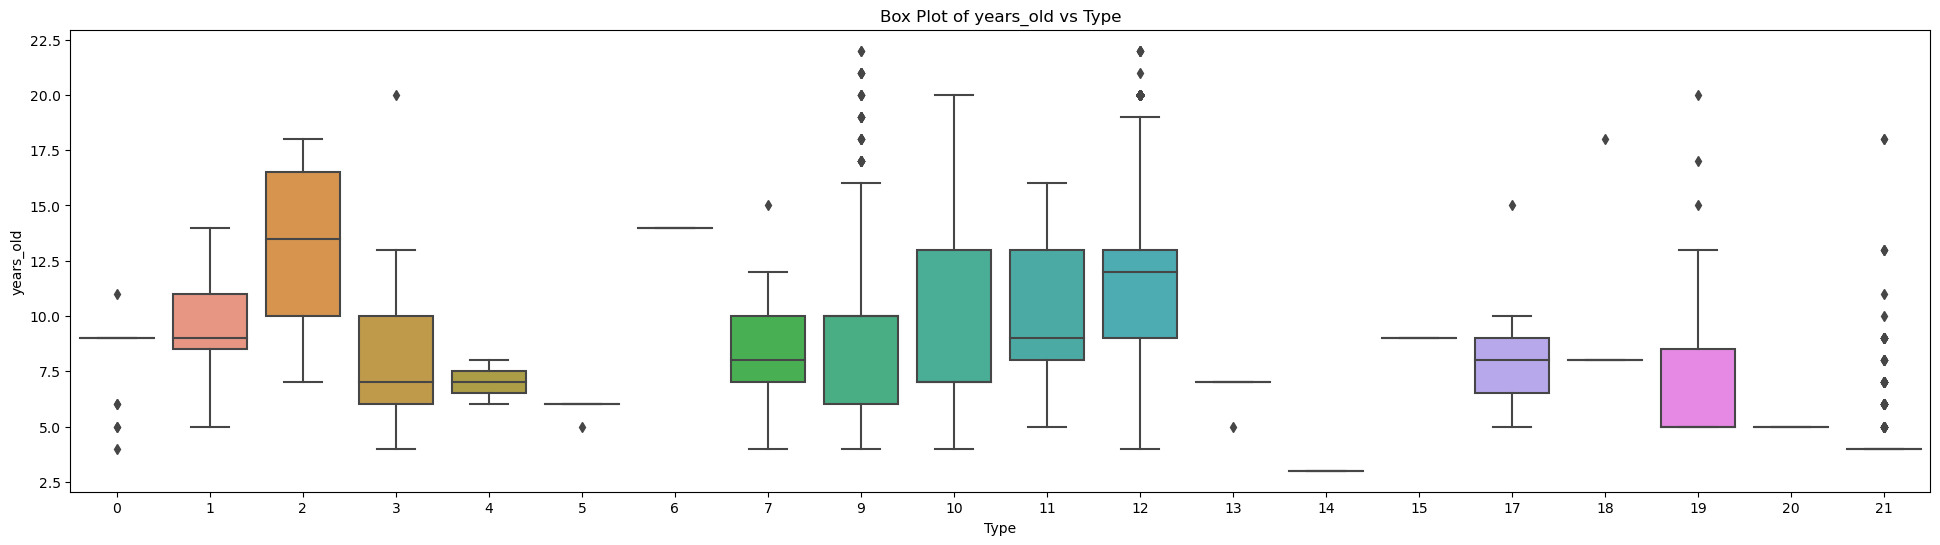

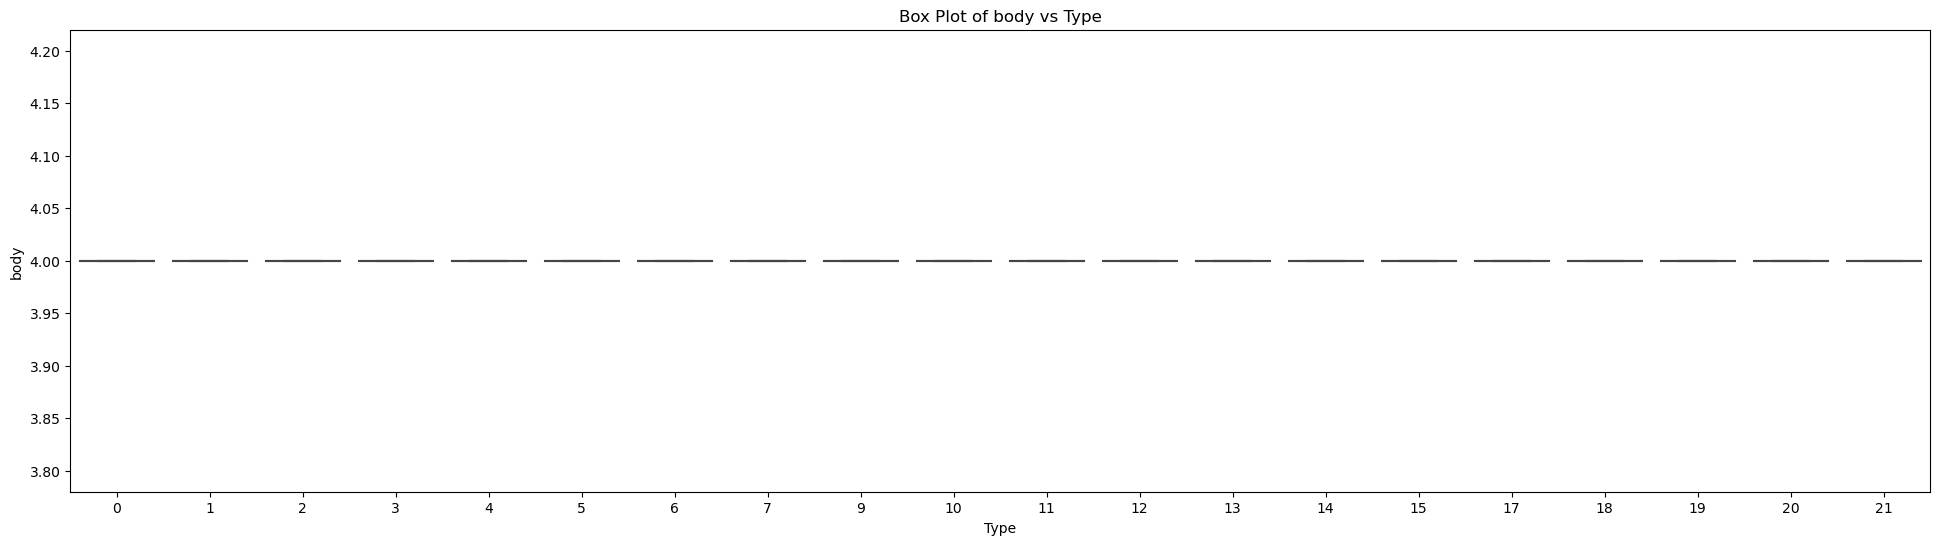

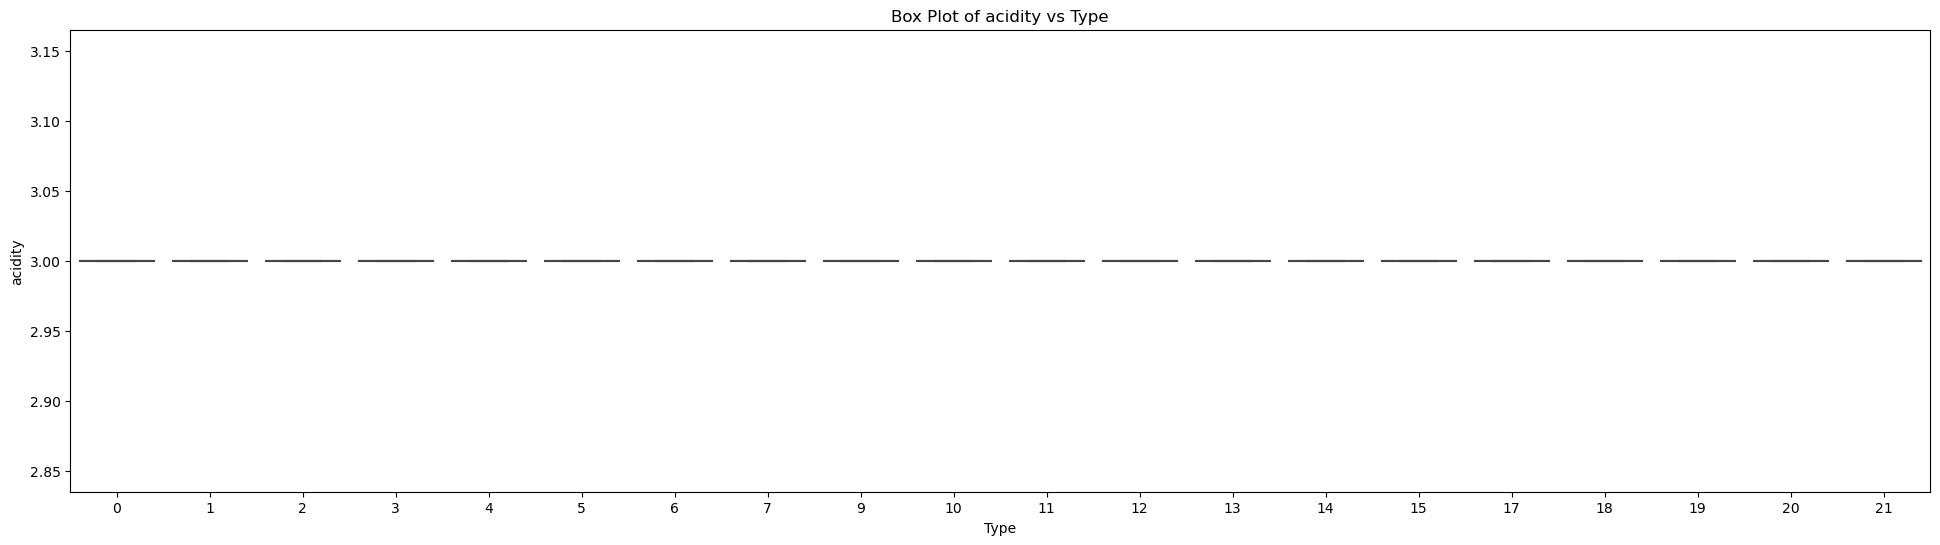

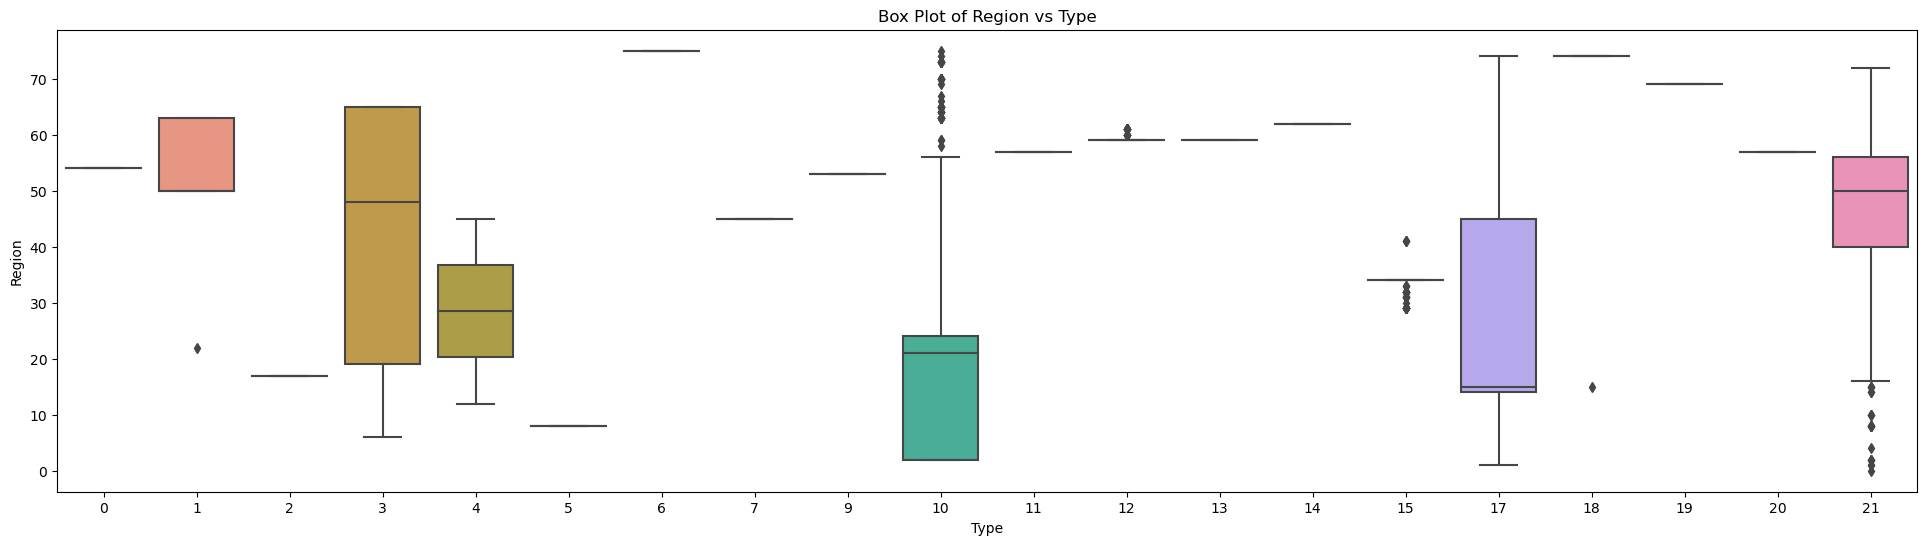

In [121]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.boxplot(x='Type', y=feature, data=df_no_outliers)
    plt.title(f'Box Plot of {feature} vs Type')
    plt.show()

### Normalization

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [126]:
df.head()

,wine,years_old,body,acidity,Region,Type
0,0.599291,0.054054,0.666667,1.0,0.986667,10
1,0.790780,0.045045,0.666667,1.0,0.786667,12
2,0.920804,0.054054,1.000000,1.0,0.760000,11
3,0.963357,0.108108,0.666667,1.0,0.786667,12
4,0.963357,0.126126,0.666667,1.0,0.786667,12


In [156]:
df_no_outliers_normalized = df_no_outliers
df_no_outliers_normalized.iloc[:, :-1] = scaler.fit_transform(df_no_outliers_normalized.iloc[:, :-1])

In [128]:
df['acidity'].unique()

array([1. , 0. , 0.5])

In [130]:
df_no_outliers['acidity'].unique()

array([3.])

In [172]:
df = df_no_outliers_normalized

### Train Test Split

In [137]:
from sklearn.model_selection import train_test_split

In [176]:
X = df.drop(columns = ['Type'])
y = df['Type']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Models

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [150]:
models = {
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'SVM': make_pipeline(StandardScaler(), SVC()),
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [180]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    if model_name in ['Random Forest', 'SVM', 'Logistic Regression', 'KNN']:
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)

Random Forest Accuracy: 0.9695431472081218
SVM Accuracy: 0.9208121827411168
Logistic Regression Accuracy: 0.8852791878172589
KNN Accuracy: 0.9350253807106599
Naive Bayes Accuracy: 0.9106598984771573
Decision Tree Accuracy: 0.9766497461928934
Gradient Boosting Accuracy: 0.9725888324873097


### Select the best Model

In [194]:
best_model = DecisionTreeClassifier()

In [196]:
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy of {best_model}:", accuracy)

Accuracy of DecisionTreeClassifier(): 0.9705583756345177


In [198]:
best_model = GradientBoostingClassifier()

In [199]:
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy of {best_model}:", accuracy)

Accuracy of GradientBoostingClassifier(): 0.9725888324873097
